![](https://raw.githubusercontent.com/jbottala02/CSC_126-2025/refs/heads/main/CSC-126%20GRAPHICS%20AND%20VISUAL%20COMPUTING.png)
# **Dilation, Erosion and Edge Detection**

####**In this lesson we'll learn:**
1. Dilation
2. Erosion
3. Opening
4. Closing
5. Canny Edge Detection

In [6]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# Download and unzip our images
!gdown --id 1qxuPaG5nqZF17Q2dZ6jmX516736yYoNv
!unzip -qq images.zip

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1qxuPaG5nqZF17Q2dZ6jmX516736yYoNv
From (redirected): https://drive.google.com/uc?id=1qxuPaG5nqZF17Q2dZ6jmX516736yYoNv&confirm=t&uuid=dd72f7e3-bd60-432f-ad5d-9a332aeb3117
To: /content/images.zip
100% 29.6M/29.6M [00:00<00:00, 220MB/s]
replace images/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


- **Dilation** – Adds pixels to the boundaries of objects in an image
- **Erosion** – Removes pixels at the boundaries of objects in an image
- **Opening** - Erosion followed by dilation
- **Closing** - Dilation followed by erosion

![](https://raw.githubusercontent.com/jbottala02/CSC_126-2025/refs/heads/main/Screenshot%202021-11-15%20at%205.19.08%20pm.png)

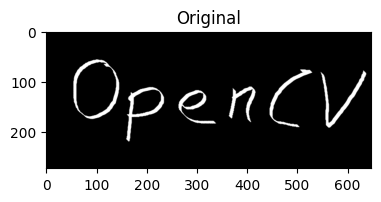

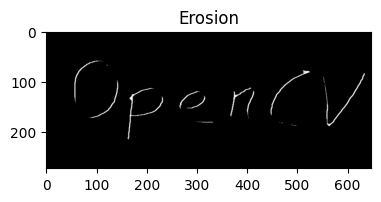

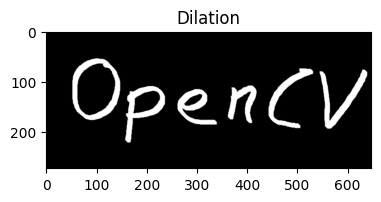

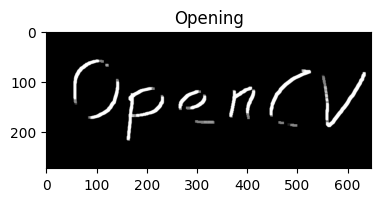

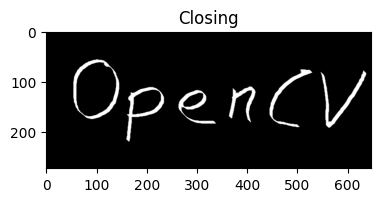

In [9]:
import cv2
import numpy as np

image = cv2.imread('images/opencv_inv.png', 0)
imshow('Original', image)

# Let's define our kernel size
kernel = np.ones((5,5), np.uint8)

# Now we erode
erosion = cv2.erode(image, kernel, iterations = 1)
imshow('Erosion', erosion)

# Dilate here
dilation = cv2.dilate(image, kernel, iterations = 1)
imshow('Dilation', dilation)

# Opening - Good for removing noise
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
imshow('Opening',opening)

# Closing - Good for removing noise
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
imshow('Closing',closing)

In [10]:
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

## **Canny Edge Detection**
![](https://raw.githubusercontent.com/jbottala02/CSC_126-2025/refs/heads/main/Screenshot%202021-11-15%20at%205.24.15%20pm.png)

- The first argument is our input image.
- The second and third arguments are our minVal and maxVal respectively.
- The forth argument is aperture_size. It is the size of Sobel kernel used for find image gradients. By default it is 3.

Edge detection needs a threshold to tell what difference/change should be counted as edge

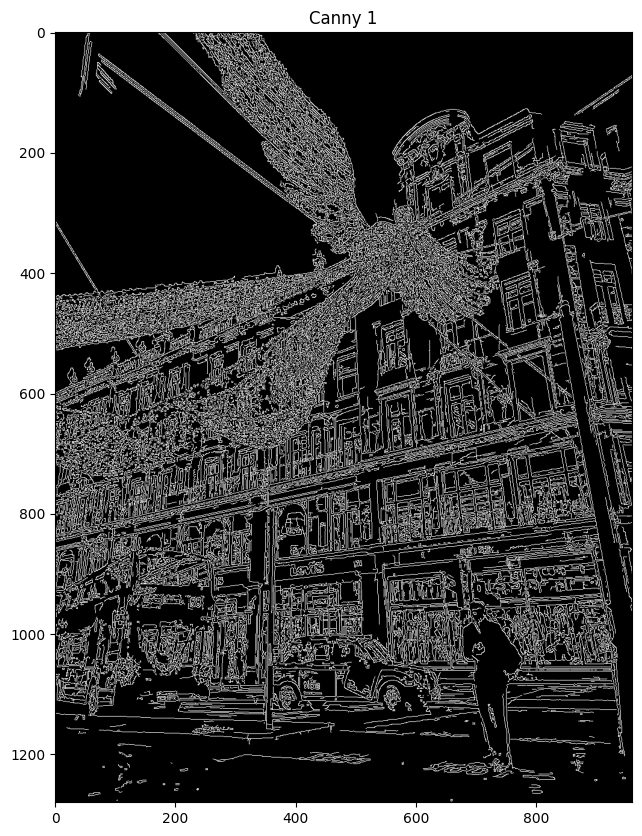

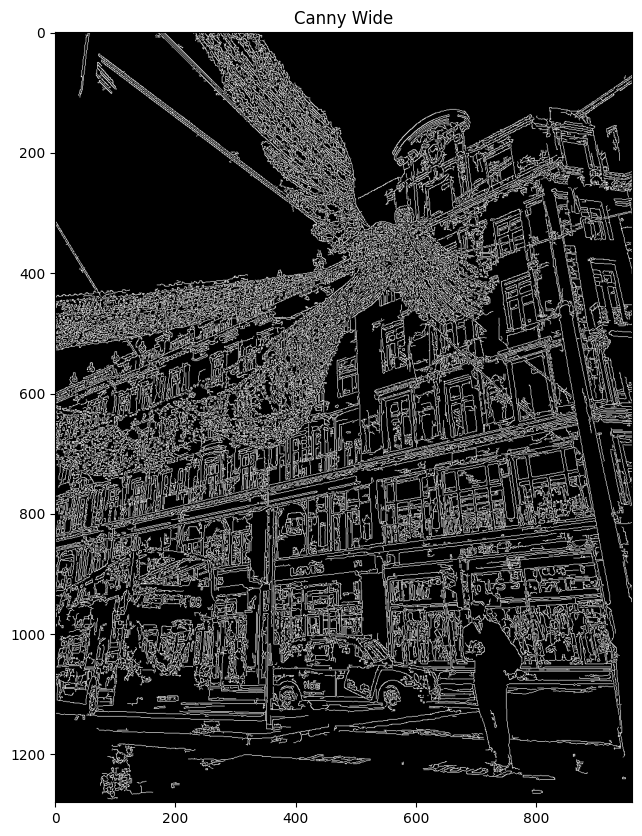

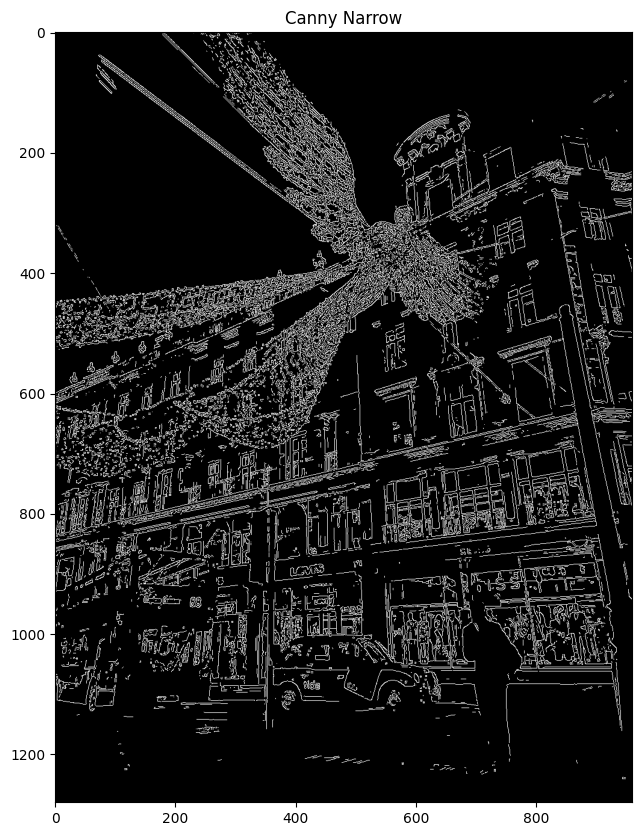

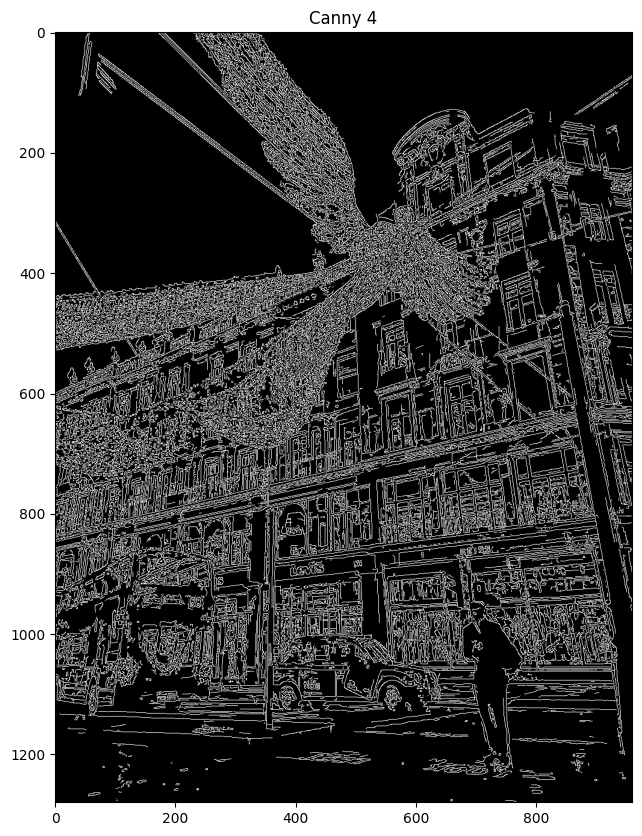

In [4]:
image = cv2.imread('images/londonxmas.jpeg',0)

# Canny Edge Detection uses gradient values as thresholds
# The first threshold gradient
canny = cv2.Canny(image, 50, 120)
imshow('Canny 1', canny)

# Wide edge thresholds expect lots of edges
canny = cv2.Canny(image, 10, 200)
imshow('Canny Wide', canny)

# Narrow threshold, expect less edges
canny = cv2.Canny(image, 200, 240)
imshow('Canny Narrow', canny)

canny = cv2.Canny(image, 60, 110)
imshow('Canny 4', canny)

##  Then, we need to provide two values: threshold1 and threshold2. Any gradient value larger than threshold2
# is considered to be an edge. Any value below threshold1 is considered not to be an edge.
#Values in between threshold1 and threshold2 are either classiﬁed as edges or non-edges based on how their
#intensities are “connected”. In this case, any gradient values below 60 are considered non-edges
#whereas any values above 120 are considered edges.

#### **Auto Canny**

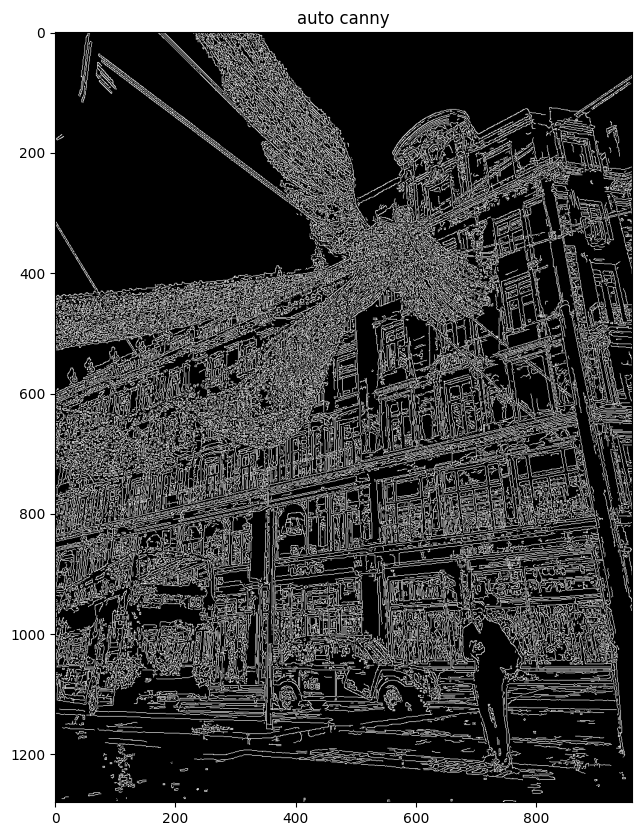

In [5]:
def autoCanny(image):
  # Finds optimal thresholds based on median image pixel intensity
  blurred_img = cv2.blur(image, ksize=(5,5))
  med_val = np.median(image)
  lower = int(max(0, 0.66 * med_val))
  upper = int(min(255, 1.33 * med_val))
  edges = cv2.Canny(image=image, threshold1=lower, threshold2=upper)
  return edges

auto_canny = autoCanny(image)
imshow("auto canny", auto_canny)

# **This is my tinkering**
by Kian Estrera DEF1

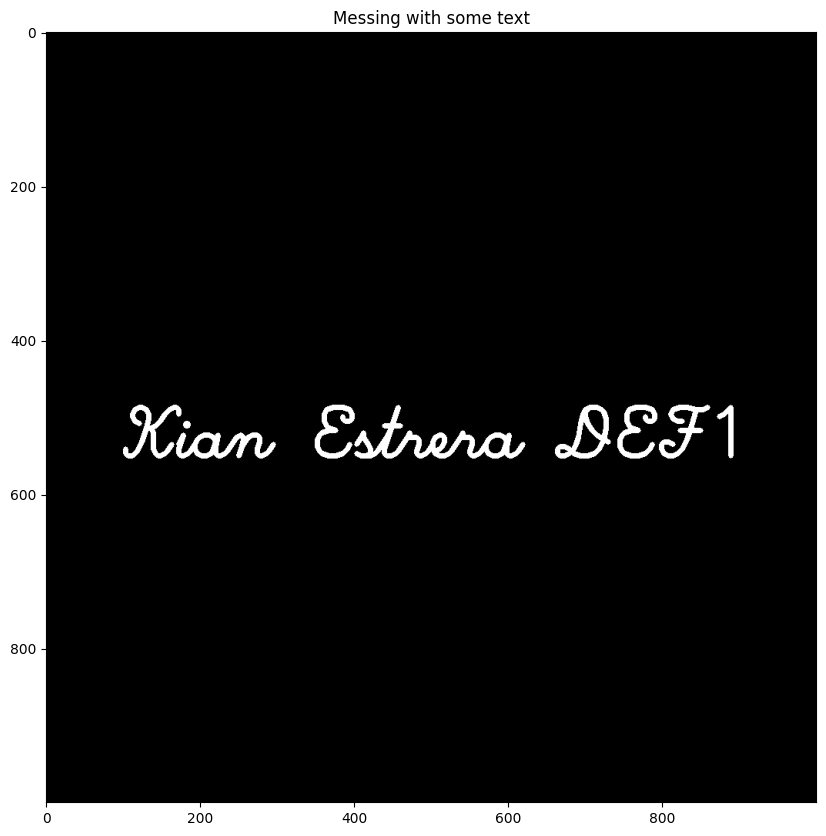

In [27]:
string_image = np.zeros((1000,1000,3), np.uint8)
ourString =  'Kian Estrera DEF1'
cv2.putText(string_image, ourString, (100,550), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 3, (255,255,255), 5)
imshow("Messing with some text", string_image)

In [19]:

# Let's define our kernel size
kernel = np.ones((5,5), np.uint8)
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

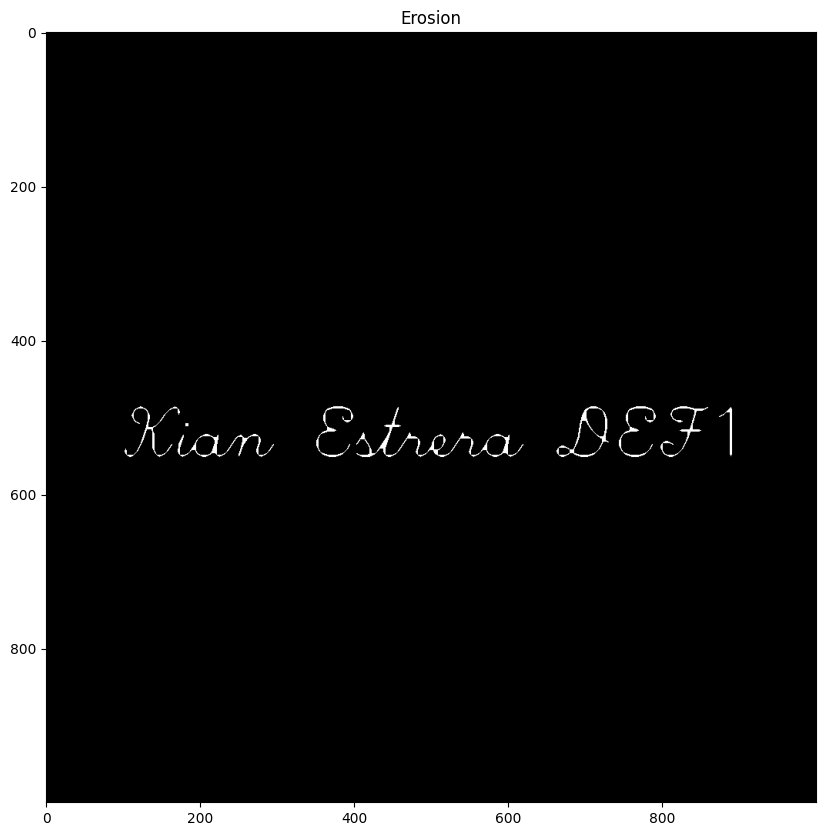

In [28]:
erosion = cv2.erode(string_image, kernel, iterations = 1)
imshow('Erosion', erosion)

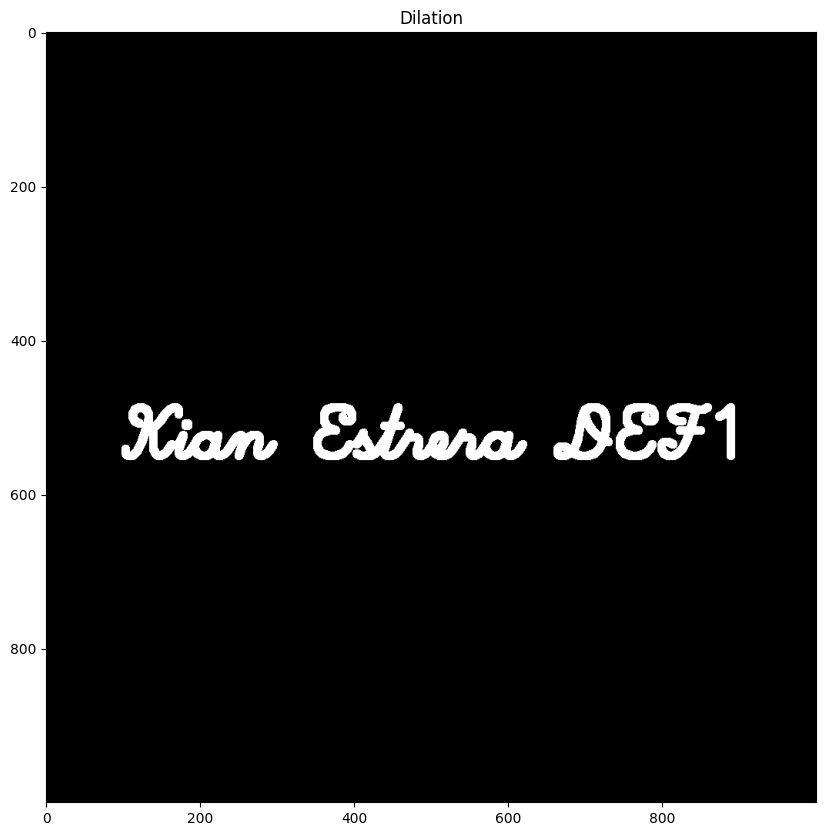

In [30]:

# Dilate here
dilation = cv2.dilate(string_image, kernel, iterations = 1)
imshow('Dilation', dilation)

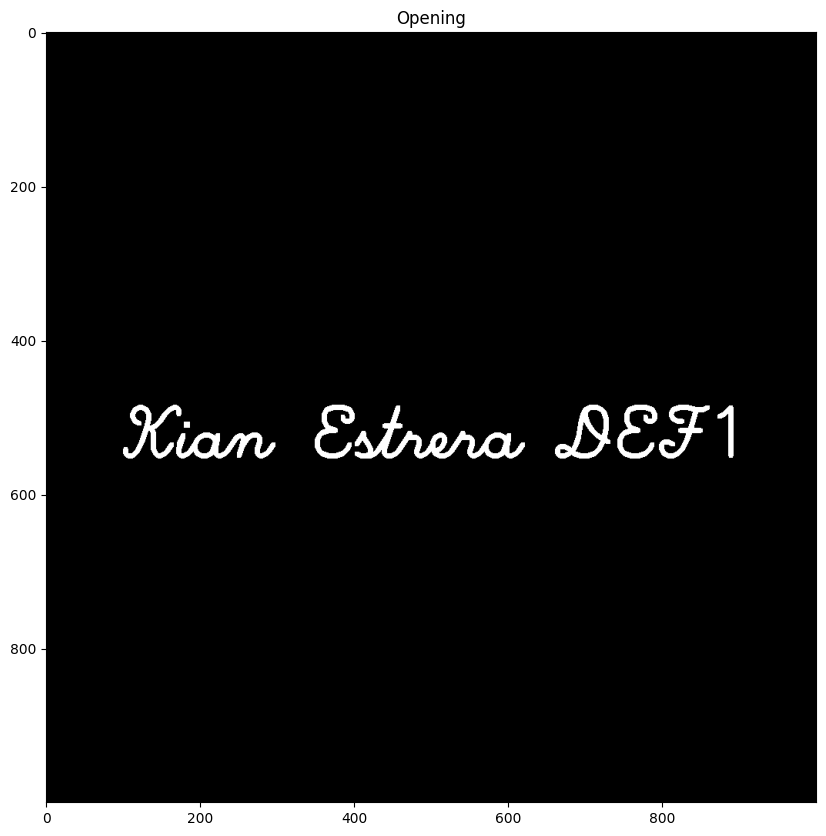

In [31]:


# Opening - Good for removing noise
opening = cv2.morphologyEx(string_image, cv2.MORPH_OPEN, kernel)
imshow('Opening',opening)


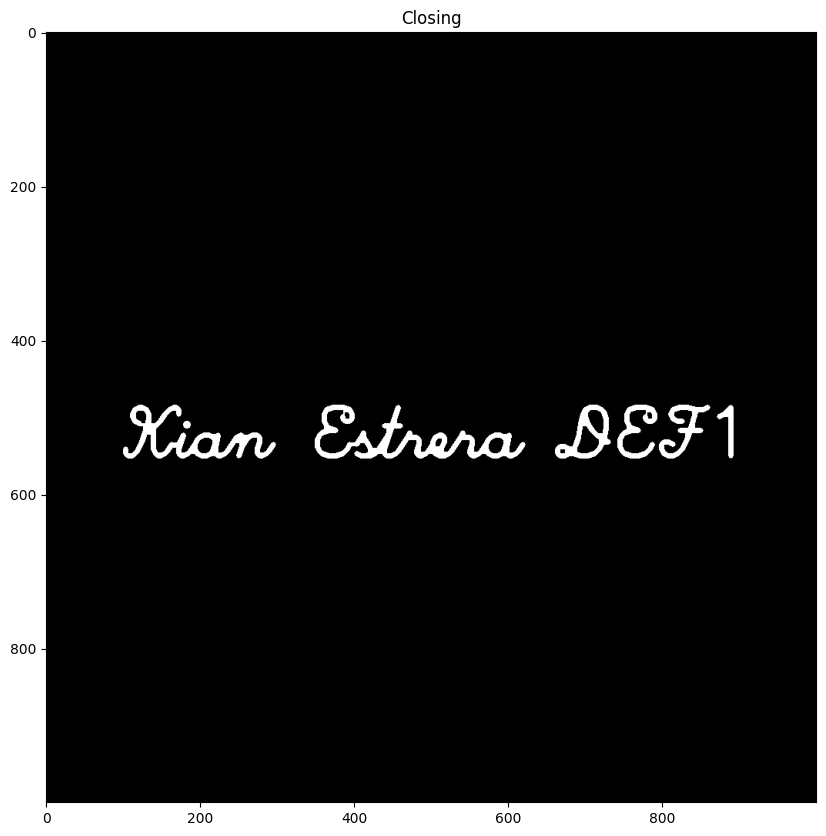

In [32]:

# Closing - Good for removing noise
closing = cv2.morphologyEx(string_image, cv2.MORPH_CLOSE, kernel)
imshow('Closing',closing)

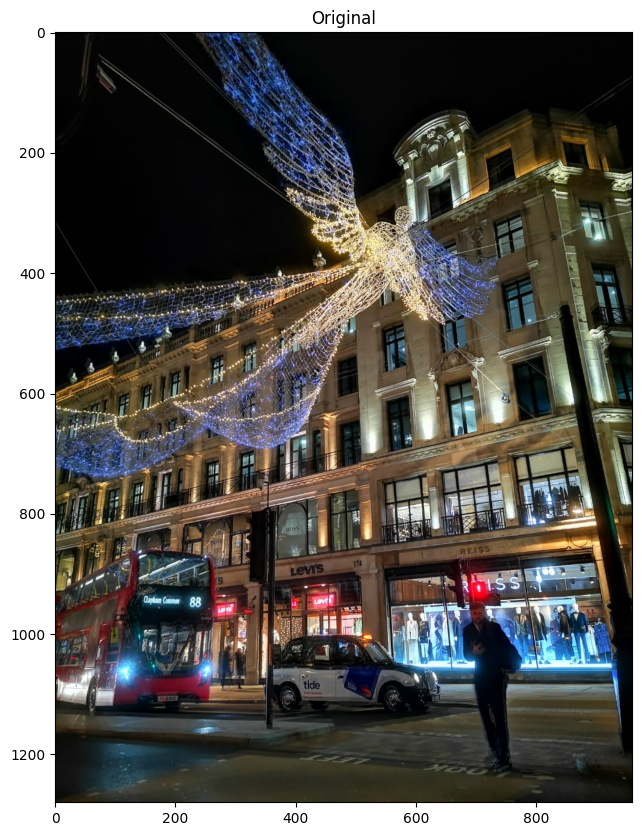

In [33]:
image = cv2.imread('images/londonxmas.jpeg')
imshow('Original', image)

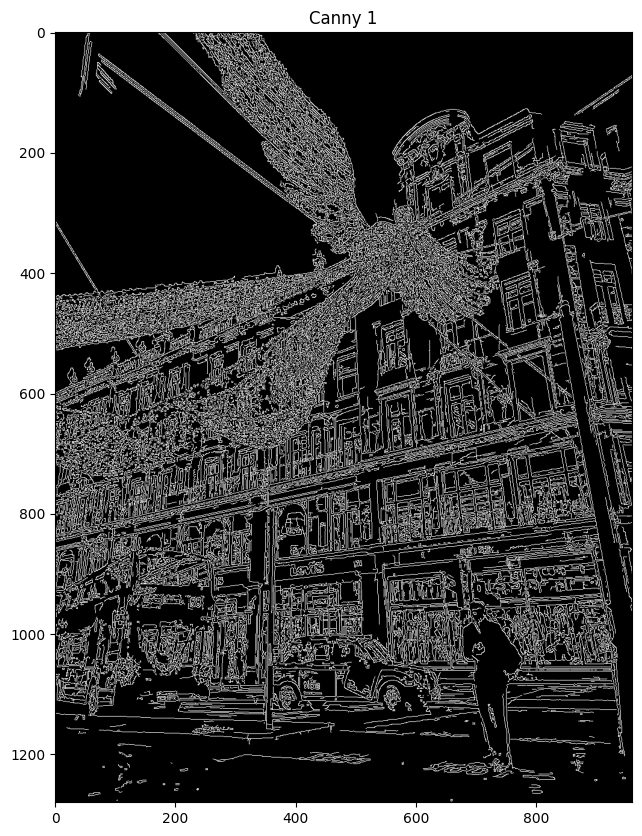

In [34]:
image = cv2.imread('images/londonxmas.jpeg',0)

# Canny Edge Detection uses gradient values as thresholds
# The first threshold gradient
canny = cv2.Canny(image, 50, 120)
imshow('Canny 1', canny)